<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20Lineal/Simple/Shared_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,3,(2) Pocas camas,(5 - 7) Buen número de reseñas mensuales,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    6442 non-null   object 
 1   source                          6442 non-null   object 
 2   host_name                       6442 non-null   object 
 3   host_response_time              6442 non-null   object 
 4   host_verifications              6442 non-null   object 
 5   neighbourhood_cleansed          6442 non-null   object 
 6   property_type                   6442 non-null   object 
 7   room_type                       6442 non-null   object 
 8   bathrooms_text                  6442 non-null   object 
 9   amenities                       6442 non-null   object 
 10  calendar_last_scraped           6442 non-null   object 
 11  host_id                         6442 non-null   int64  
 12  host_since                      64

In [4]:
# Conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,5387
Private room,2,1024
Hotel room,1,21
Shared room,3,10


In [5]:
# Fragmentamos el dataframe solo con las variables a analizar
df3 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [6]:
df3["review_scores_location"]

,review_scores_location
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
6437,5.0
6438,5.0
6439,5.0
6440,5.0


In [7]:
# Corroboramos
df3["room_type_num"].value_counts()

,count
room_type_num,
0,5387
2,1024
1,21
3,10


## Dividir el DataFrame según el tipo de habitación
## Shared Room | 3

In [8]:
dfHome3 = df3[df3["room_type_num"] == 3]
dfHome3

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,100.0,100.0,5.0,4.0,69.0,365,10.0,0.12,5.0,1
971,3,100.0,100.0,5.0,4.0,58.0,365,22.0,0.26,5.0,0
1363,3,100.0,100.0,5.0,4.0,43.0,365,11.0,0.15,5.0,1
1548,3,100.0,100.0,5.0,5.0,35.0,347,63.0,2.00,5.0,197
2123,3,100.0,100.0,5.0,4.0,84.0,342,106.0,2.47,5.0,32
3014,3,92.3,0.0,5.0,5.0,150.0,87,0.0,1.78,5.0,0
4441,3,100.0,100.0,5.0,4.0,45.0,339,40.0,2.77,5.0,28
4924,3,20.0,0.0,5.0,3.0,100.0,61,1.0,0.10,4.0,1
4994,3,93.0,100.0,5.0,5.0,110.0,111,3.0,0.43,5.0,3
6097,3,100.0,100.0,5.0,5.0,133.0,269,1.0,1.00,5.0,1


## Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

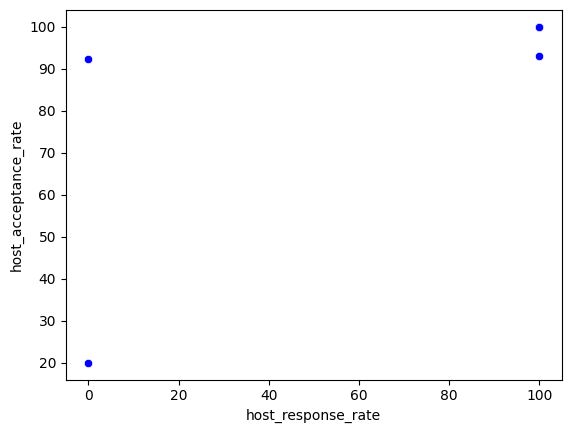

In [9]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome3)

In [10]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome3[["host_acceptance_rate"]] # Dependiente = y

In [11]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [13]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.42975]]),
 'rank_': 1,
 'singular_': array([126.49110641]),
 'intercept_': array([56.15])}

## Modelo matemático: y = 0.42975x + 56.15

In [14]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome3[['host_response_rate']])
y_pred

array([[99.125],
       [99.125],
       [99.125],
       [99.125],
       [99.125],
       [56.15 ],
       [99.125],
       [56.15 ],
       [99.125],
       [99.125]])

In [15]:
# Insertamos la columna de predicciones en el df
dfHome3.insert(2, 'Predict1', y_pred)
dfHome3

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,100.0,99.125,100.0,5.0,4.0,69.0,365,10.0,0.12,5.0,1
971,3,100.0,99.125,100.0,5.0,4.0,58.0,365,22.0,0.26,5.0,0
1363,3,100.0,99.125,100.0,5.0,4.0,43.0,365,11.0,0.15,5.0,1
1548,3,100.0,99.125,100.0,5.0,5.0,35.0,347,63.0,2.00,5.0,197
2123,3,100.0,99.125,100.0,5.0,4.0,84.0,342,106.0,2.47,5.0,32
3014,3,92.3,56.150,0.0,5.0,5.0,150.0,87,0.0,1.78,5.0,0
4441,3,100.0,99.125,100.0,5.0,4.0,45.0,339,40.0,2.77,5.0,28
4924,3,20.0,56.150,0.0,5.0,3.0,100.0,61,1.0,0.10,4.0,1
4994,3,93.0,99.125,100.0,5.0,5.0,110.0,111,3.0,0.43,5.0,3
6097,3,100.0,99.125,100.0,5.0,5.0,133.0,269,1.0,1.00,5.0,1


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

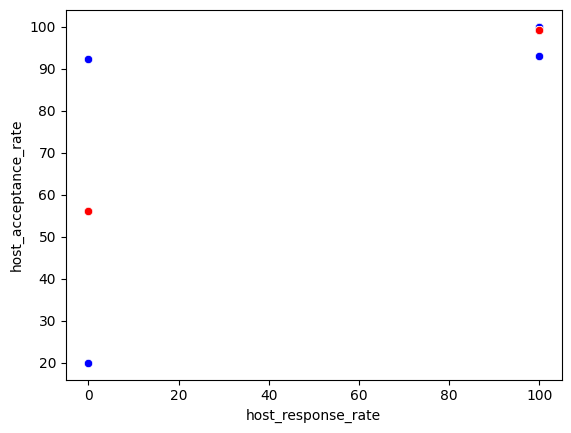

In [16]:
# Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome3)

In [17]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_0 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_0

0.5265919995095771

In [18]:
# Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_0 = np.sqrt(coef_Deter_0)
coef_Correl_0

0.7256665897707962

## Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

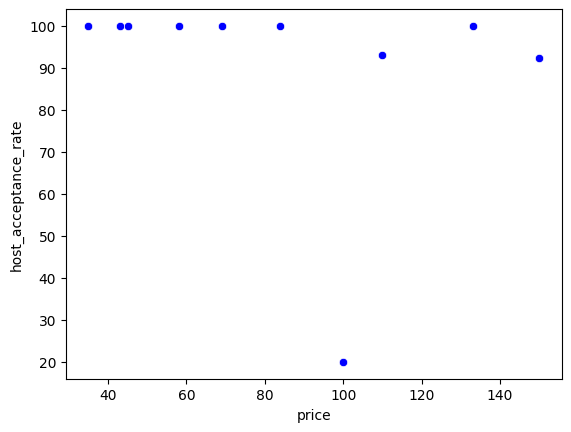

In [19]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome3)

In [20]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["price"]]
Var_Dep = dfHome3[["host_acceptance_rate"]]

In [21]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.14766473]]),
 'rank_': 1,
 'singular_': array([119.06342847]),
 'intercept_': array([102.74187329])}

## Modelo matemático: y = -0.14766473x + 102.74187329

In [22]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome3[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome3.insert(8, 'Predict2', y_pred)
dfHome3

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,100.0,99.125,100.0,5.0,4.0,69.0,365,92.553007,10.0,0.12,5.0,1
971,3,100.0,99.125,100.0,5.0,4.0,58.0,365,94.177319,22.0,0.26,5.0,0
1363,3,100.0,99.125,100.0,5.0,4.0,43.0,365,96.392290,11.0,0.15,5.0,1
1548,3,100.0,99.125,100.0,5.0,5.0,35.0,347,97.573608,63.0,2.00,5.0,197
2123,3,100.0,99.125,100.0,5.0,4.0,84.0,342,90.338036,106.0,2.47,5.0,32
3014,3,92.3,56.150,0.0,5.0,5.0,150.0,87,80.592164,0.0,1.78,5.0,0
4441,3,100.0,99.125,100.0,5.0,4.0,45.0,339,96.096960,40.0,2.77,5.0,28
4924,3,20.0,56.150,0.0,5.0,3.0,100.0,61,87.975400,1.0,0.10,4.0,1
4994,3,93.0,99.125,100.0,5.0,5.0,110.0,111,86.498753,3.0,0.43,5.0,3
6097,3,100.0,99.125,100.0,5.0,5.0,133.0,269,83.102464,1.0,1.00,5.0,1


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

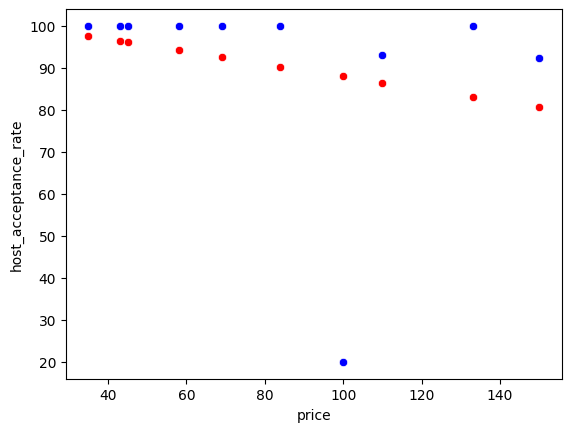

In [23]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome3)

In [24]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1

0.05508493373927492

In [25]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1

0.23470179747772474

## Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

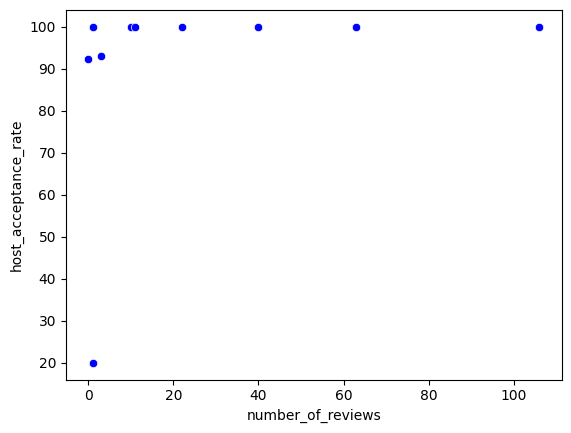

In [26]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome3)

In [27]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["number_of_reviews"]]
Var_Dep = dfHome3[["host_acceptance_rate"]]

In [28]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.21370178]]),
 'rank_': 1,
 'singular_': array([104.48014165]),
 'intercept_': array([85.03786426])}

## Modelo matemático y = 0.21370178x + 85.03786426

In [29]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome3[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome3.insert(1, 'Predict3', y_pred)
dfHome3

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,87.174882,100.0,99.125,100.0,5.0,4.0,69.0,365,92.553007,10.0,0.12,5.0,1
971,3,89.739303,100.0,99.125,100.0,5.0,4.0,58.0,365,94.177319,22.0,0.26,5.0,0
1363,3,87.388584,100.0,99.125,100.0,5.0,4.0,43.0,365,96.392290,11.0,0.15,5.0,1
1548,3,98.501076,100.0,99.125,100.0,5.0,5.0,35.0,347,97.573608,63.0,2.00,5.0,197
2123,3,107.690253,100.0,99.125,100.0,5.0,4.0,84.0,342,90.338036,106.0,2.47,5.0,32
3014,3,85.037864,92.3,56.150,0.0,5.0,5.0,150.0,87,80.592164,0.0,1.78,5.0,0
4441,3,93.585935,100.0,99.125,100.0,5.0,4.0,45.0,339,96.096960,40.0,2.77,5.0,28
4924,3,85.251566,20.0,56.150,0.0,5.0,3.0,100.0,61,87.975400,1.0,0.10,4.0,1
4994,3,85.678970,93.0,99.125,100.0,5.0,5.0,110.0,111,86.498753,3.0,0.43,5.0,3
6097,3,85.251566,100.0,99.125,100.0,5.0,5.0,133.0,269,83.102464,1.0,1.00,5.0,1


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

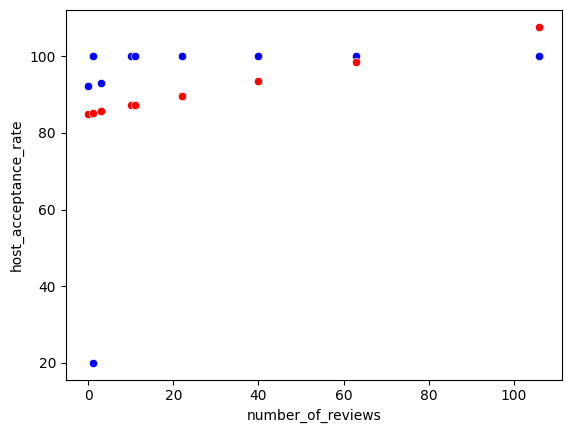

In [30]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome3)

In [31]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2

0.08883953723189753

In [32]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2

0.2980596202639625

## Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

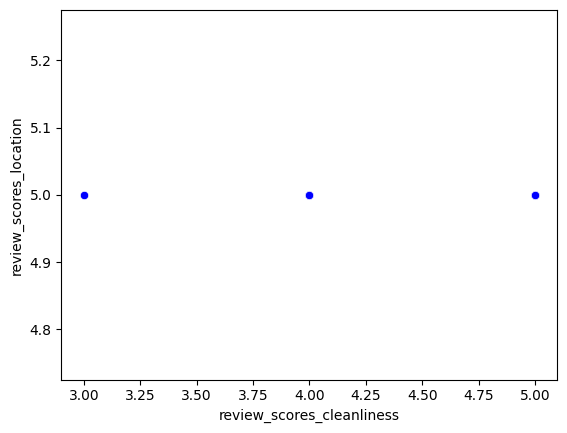

In [33]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome3)

In [34]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["review_scores_cleanliness"]]
Var_Dep = dfHome3[["review_scores_location"]]

In [35]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 1,
 'singular_': array([2.02484567]),
 'intercept_': array([5.])}

## Modelo Matemático: y = 0.x + 5.

In [36]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome3[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de predicciones en el df
dfHome3.insert(6, 'Predict4', y_pred)
dfHome3

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,87.174882,100.0,99.125,100.0,5.0,5.0,4.0,69.0,365,92.553007,10.0,0.12,5.0,1
971,3,89.739303,100.0,99.125,100.0,5.0,5.0,4.0,58.0,365,94.177319,22.0,0.26,5.0,0
1363,3,87.388584,100.0,99.125,100.0,5.0,5.0,4.0,43.0,365,96.392290,11.0,0.15,5.0,1
1548,3,98.501076,100.0,99.125,100.0,5.0,5.0,5.0,35.0,347,97.573608,63.0,2.00,5.0,197
2123,3,107.690253,100.0,99.125,100.0,5.0,5.0,4.0,84.0,342,90.338036,106.0,2.47,5.0,32
3014,3,85.037864,92.3,56.150,0.0,5.0,5.0,5.0,150.0,87,80.592164,0.0,1.78,5.0,0
4441,3,93.585935,100.0,99.125,100.0,5.0,5.0,4.0,45.0,339,96.096960,40.0,2.77,5.0,28
4924,3,85.251566,20.0,56.150,0.0,5.0,5.0,3.0,100.0,61,87.975400,1.0,0.10,4.0,1
4994,3,85.678970,93.0,99.125,100.0,5.0,5.0,5.0,110.0,111,86.498753,3.0,0.43,5.0,3
6097,3,85.251566,100.0,99.125,100.0,5.0,5.0,5.0,133.0,269,83.102464,1.0,1.00,5.0,1


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

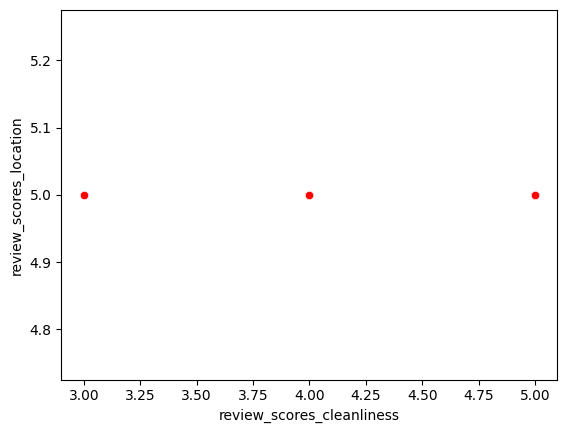

In [37]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome3)

In [38]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3

1.0

In [39]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

1.0

## Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

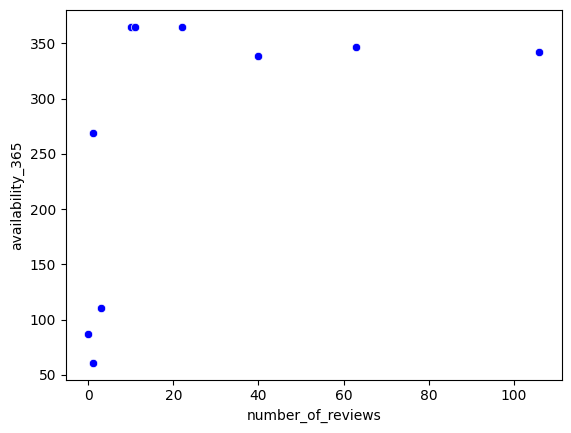

In [40]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome3)

In [41]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["number_of_reviews"]]
Var_Dep = dfHome3[["availability_365"]]

In [42]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.82302287]]),
 'rank_': 1,
 'singular_': array([104.48014165]),
 'intercept_': array([218.24831213])}

## Modelo Matemático: y = 1.82302287x + 218.24831213

In [43]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome3[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome3.insert(7, 'Predict5', y_pred)
dfHome3

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,87.174882,100.0,99.125,100.0,5.0,5.0,236.478541,4.0,69.0,365,92.553007,10.0,0.12,5.0,1
971,3,89.739303,100.0,99.125,100.0,5.0,5.0,258.354815,4.0,58.0,365,94.177319,22.0,0.26,5.0,0
1363,3,87.388584,100.0,99.125,100.0,5.0,5.0,238.301564,4.0,43.0,365,96.392290,11.0,0.15,5.0,1
1548,3,98.501076,100.0,99.125,100.0,5.0,5.0,333.098753,5.0,35.0,347,97.573608,63.0,2.00,5.0,197
2123,3,107.690253,100.0,99.125,100.0,5.0,5.0,411.488737,4.0,84.0,342,90.338036,106.0,2.47,5.0,32
3014,3,85.037864,92.3,56.150,0.0,5.0,5.0,218.248312,5.0,150.0,87,80.592164,0.0,1.78,5.0,0
4441,3,93.585935,100.0,99.125,100.0,5.0,5.0,291.169227,4.0,45.0,339,96.096960,40.0,2.77,5.0,28
4924,3,85.251566,20.0,56.150,0.0,5.0,5.0,220.071335,3.0,100.0,61,87.975400,1.0,0.10,4.0,1
4994,3,85.678970,93.0,99.125,100.0,5.0,5.0,223.717381,5.0,110.0,111,86.498753,3.0,0.43,5.0,3
6097,3,85.251566,100.0,99.125,100.0,5.0,5.0,220.071335,5.0,133.0,269,83.102464,1.0,1.00,5.0,1


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

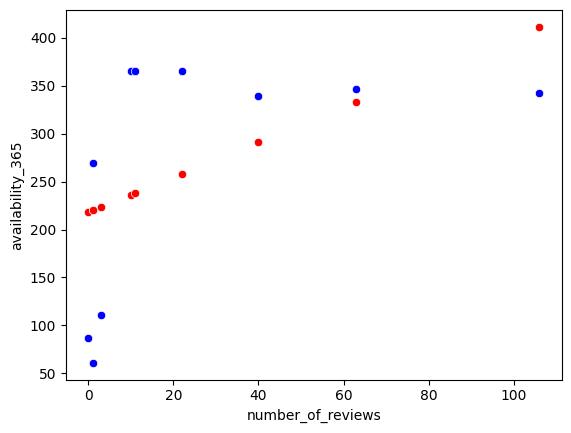

In [44]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome3)

In [45]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4

0.2499206198694811

In [46]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4

0.4999206135672754

## Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

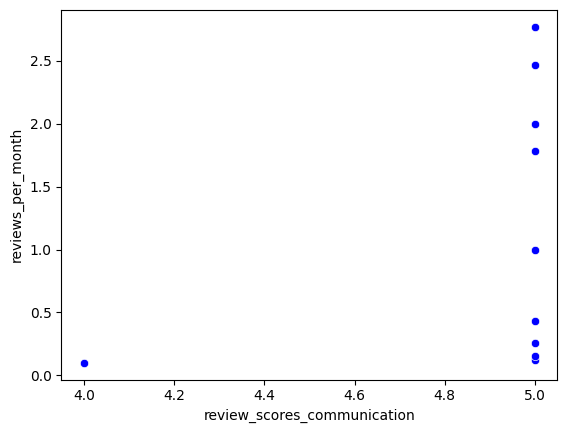

In [47]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome3)

In [48]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["review_scores_communication"]]
Var_Dep = dfHome3[["reviews_per_month"]]

In [49]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.12]]),
 'rank_': 1,
 'singular_': array([0.9486833]),
 'intercept_': array([-4.38])}

## Modelo Matemático: y = 1.12x - 4.38

In [50]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome3[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome3.insert(13, 'Predict6', y_pred)
dfHome3

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,87.174882,100.0,99.125,100.0,5.0,5.0,236.478541,4.0,69.0,365,92.553007,10.0,1.22,0.12,5.0,1
971,3,89.739303,100.0,99.125,100.0,5.0,5.0,258.354815,4.0,58.0,365,94.177319,22.0,1.22,0.26,5.0,0
1363,3,87.388584,100.0,99.125,100.0,5.0,5.0,238.301564,4.0,43.0,365,96.392290,11.0,1.22,0.15,5.0,1
1548,3,98.501076,100.0,99.125,100.0,5.0,5.0,333.098753,5.0,35.0,347,97.573608,63.0,1.22,2.00,5.0,197
2123,3,107.690253,100.0,99.125,100.0,5.0,5.0,411.488737,4.0,84.0,342,90.338036,106.0,1.22,2.47,5.0,32
3014,3,85.037864,92.3,56.150,0.0,5.0,5.0,218.248312,5.0,150.0,87,80.592164,0.0,1.22,1.78,5.0,0
4441,3,93.585935,100.0,99.125,100.0,5.0,5.0,291.169227,4.0,45.0,339,96.096960,40.0,1.22,2.77,5.0,28
4924,3,85.251566,20.0,56.150,0.0,5.0,5.0,220.071335,3.0,100.0,61,87.975400,1.0,0.10,0.10,4.0,1
4994,3,85.678970,93.0,99.125,100.0,5.0,5.0,223.717381,5.0,110.0,111,86.498753,3.0,1.22,0.43,5.0,3
6097,3,85.251566,100.0,99.125,100.0,5.0,5.0,220.071335,5.0,133.0,269,83.102464,1.0,1.22,1.00,5.0,1


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

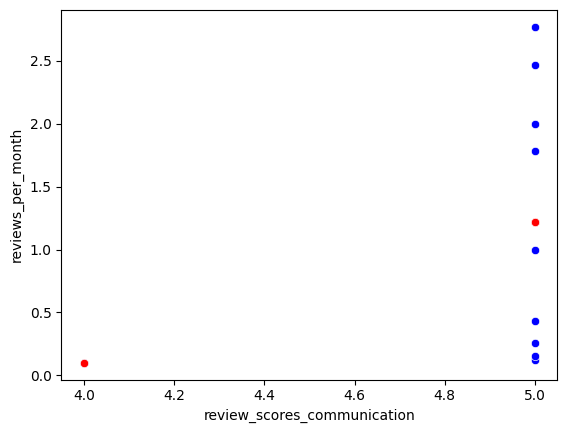

In [51]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome3)

In [52]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5

0.11329297859700405

In [53]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.3365902235612378

## RESUMEN

In [54]:
# Para el tipo de casa "Entire Home/Apt", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_0}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_1}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_2}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_3}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_4}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_5}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 0.7256665897707962
Filtro 2: 'host_acceptance_rate vs price': 0.23470179747772474
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.2980596202639625
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 1.0
Filtro 5: 'availability_365 vs number_of_reviews': 0.4999206135672754
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.3365902235612378


## Mejor modelo matemático simple

In [55]:
# Modelo usando las regresiones lineales
dfModel = dfHome3[dfHome3["room_type_num"] == 3]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,87.174882,100.0,99.125,100.0,5.0,5.0,236.478541,4.0,69.0,365,92.553007,10.0,1.22,0.12,5.0,1
971,89.739303,100.0,99.125,100.0,5.0,5.0,258.354815,4.0,58.0,365,94.177319,22.0,1.22,0.26,5.0,0
1363,87.388584,100.0,99.125,100.0,5.0,5.0,238.301564,4.0,43.0,365,96.392290,11.0,1.22,0.15,5.0,1
1548,98.501076,100.0,99.125,100.0,5.0,5.0,333.098753,5.0,35.0,347,97.573608,63.0,1.22,2.00,5.0,197
2123,107.690253,100.0,99.125,100.0,5.0,5.0,411.488737,4.0,84.0,342,90.338036,106.0,1.22,2.47,5.0,32
3014,85.037864,92.3,56.150,0.0,5.0,5.0,218.248312,5.0,150.0,87,80.592164,0.0,1.22,1.78,5.0,0
4441,93.585935,100.0,99.125,100.0,5.0,5.0,291.169227,4.0,45.0,339,96.096960,40.0,1.22,2.77,5.0,28
4924,85.251566,20.0,56.150,0.0,5.0,5.0,220.071335,3.0,100.0,61,87.975400,1.0,0.10,0.10,4.0,1
4994,85.678970,93.0,99.125,100.0,5.0,5.0,223.717381,5.0,110.0,111,86.498753,3.0,1.22,0.43,5.0,3
6097,85.251566,100.0,99.125,100.0,5.0,5.0,220.071335,5.0,133.0,269,83.102464,1.0,1.22,1.00,5.0,1


In [56]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict3,1.000000
Predict5,1.000000
number_of_reviews,1.000000
reviews_per_month,0.681665
number_of_reviews_ltm,0.530562
availability_365,0.499921
price,0.429502
Predict2,0.429502
Predict1,0.381361
host_response_rate,0.381361


<Axes: >

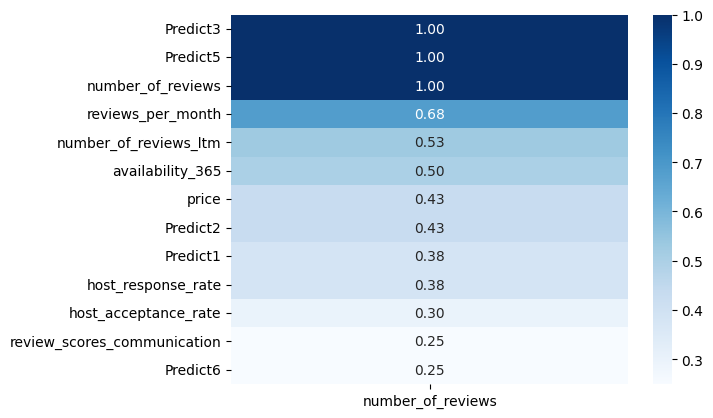

In [57]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [58]:
# Modelo original
df = df[df["room_type_num"] == 3]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
964,85076667,2016,100.0,100.0,1.0,13,1,1,47.663250,-122.352150,...,10.0,0.12,69.0,1.0,12.0,21,3,5,1349.36,2
971,85076667,2016,100.0,100.0,1.0,13,1,1,47.661250,-122.352460,...,22.0,0.26,58.0,2.0,40.0,21,3,5,1134.25,2
1363,85076667,2016,100.0,100.0,1.0,13,1,1,47.669690,-122.361500,...,11.0,0.15,43.0,2.0,27.0,83,3,5,840.91,2
1548,31751507,2015,100.0,100.0,0.0,5,1,1,47.609960,-122.339000,...,63.0,2.00,35.0,2.0,17.0,12,3,5,684.46,2
2123,31751507,2015,100.0,100.0,0.0,5,1,1,47.607750,-122.338630,...,106.0,2.47,84.0,2.0,17.0,12,3,5,1642.70,2
3014,442656014,2022,0.0,92.3,0.0,1,0,0,47.674138,-122.266272,...,0.0,1.78,150.0,1.0,8.0,86,0,5,2933.40,1
4441,31751507,2015,100.0,100.0,0.0,5,1,1,47.609334,-122.338562,...,40.0,2.77,45.0,2.0,17.0,12,3,5,880.02,2
4924,485859922,2022,0.0,20.0,0.0,1,1,1,47.616941,-122.337531,...,1.0,0.10,100.0,2.0,11.0,4,0,5,1955.60,2
4994,3147600,2012,100.0,93.0,1.0,4,1,1,47.625479,-122.299162,...,3.0,0.43,110.0,1.0,75.0,75,1,5,2151.16,2
6097,570077559,2024,100.0,100.0,0.0,1,1,1,47.657860,-122.341500,...,1.0,1.00,133.0,0.0,29.0,80,1,5,2600.95,2


In [59]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
bathrooms,0.875851
instant_bookable,0.871167
reviews_per_month,0.681665
minimum_nights_avg_ntm,0.639029
number_of_reviews_l30d,0.637808
latitude,0.624069
host_response_time_num,0.588629
neighbourhood_cleansed_num,0.546613
number_of_reviews_ltm,0.530562


<Axes: >

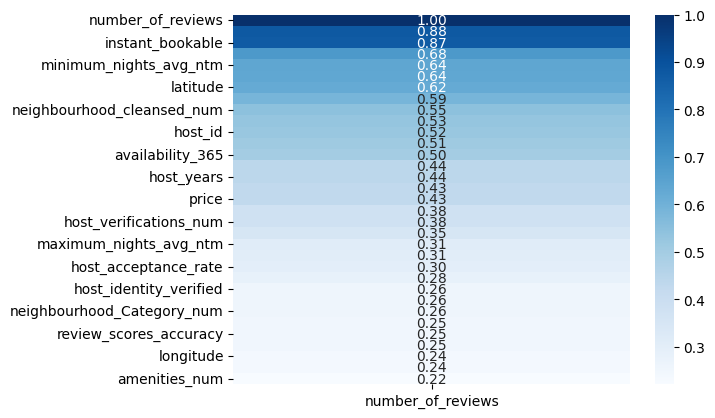

In [60]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

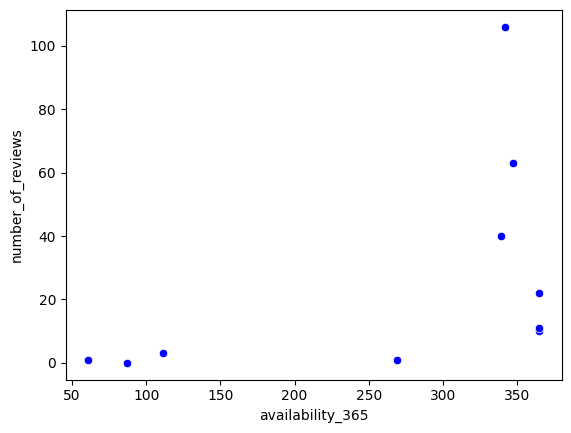

In [61]:
# Para este tipo de habitación "Shared Room", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'availability_365', y = 'number_of_reviews', color = 'blue', data = dfHome3)

In [62]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome3[["availability_365"]]
Var_Dep = dfHome3[["number_of_reviews"]]

In [63]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.13709132]]),
 'rank_': 1,
 'singular_': array([380.99986877]),
 'intercept_': array([-10.64291004])}

## Modelo Matemático: y = 0.13709132x - 10.64291004

In [64]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "availability_365"
y_pred = model.predict(X = dfHome3[['availability_365']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome3.insert(13, 'PredictFinal', y_pred)
dfHome3

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
964,3,87.174882,100.0,99.125,100.0,5.0,5.0,236.478541,4.0,69.0,365,92.553007,10.0,39.395423,1.22,0.12,5.0,1
971,3,89.739303,100.0,99.125,100.0,5.0,5.0,258.354815,4.0,58.0,365,94.177319,22.0,39.395423,1.22,0.26,5.0,0
1363,3,87.388584,100.0,99.125,100.0,5.0,5.0,238.301564,4.0,43.0,365,96.392290,11.0,39.395423,1.22,0.15,5.0,1
1548,3,98.501076,100.0,99.125,100.0,5.0,5.0,333.098753,5.0,35.0,347,97.573608,63.0,36.927779,1.22,2.00,5.0,197
2123,3,107.690253,100.0,99.125,100.0,5.0,5.0,411.488737,4.0,84.0,342,90.338036,106.0,36.242323,1.22,2.47,5.0,32
3014,3,85.037864,92.3,56.150,0.0,5.0,5.0,218.248312,5.0,150.0,87,80.592164,0.0,1.284035,1.22,1.78,5.0,0
4441,3,93.585935,100.0,99.125,100.0,5.0,5.0,291.169227,4.0,45.0,339,96.096960,40.0,35.831049,1.22,2.77,5.0,28
4924,3,85.251566,20.0,56.150,0.0,5.0,5.0,220.071335,3.0,100.0,61,87.975400,1.0,-2.280339,0.10,0.10,4.0,1
4994,3,85.678970,93.0,99.125,100.0,5.0,5.0,223.717381,5.0,110.0,111,86.498753,3.0,4.574227,1.22,0.43,5.0,3
6097,3,85.251566,100.0,99.125,100.0,5.0,5.0,220.071335,5.0,133.0,269,83.102464,1.0,26.234656,1.22,1.00,5.0,1


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

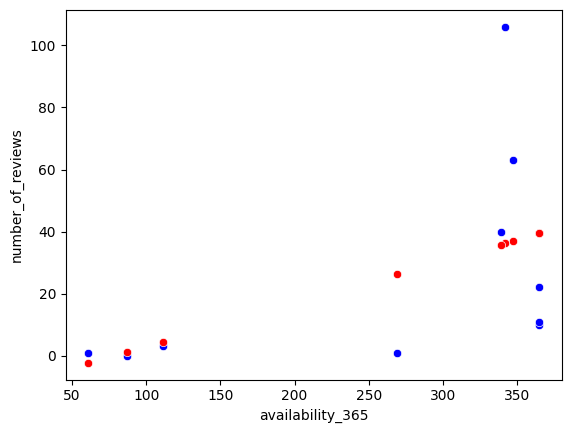

In [65]:
# Gráfica de comparación
sns.scatterplot(x = 'availability_365', y = 'number_of_reviews', color = 'blue', data = dfHome3)
sns.scatterplot(x = 'availability_365', y = 'PredictFinal', color = "red", data = dfHome3)

In [66]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal

0.249920619869481

In [67]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.4999206135672753